In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
old_assembly = pd.read_csv('../data/grch37_cnvr_cnv_values.csv')
sample_old = old_assembly[['Chromosome', 'Start', 'End', 'LP6005441-DNA_B10']]
#sample_old = old_assembly[old_assembly['Sample_ID'] == 'LP6005441-DNA_B10']
#sample_old = sample_old[['Chromosome', 'Start', 'End', 'RD']]
#sample_old['RD'] = sample_old['RD'] * 2
#sample_old['Chromosome'] = str('chr')+sample_old['Chromosome']
    #sample_old.to_csv('LP6005441-DNA_B10_grch37.bed', index=False, header=False, sep='\t')
    #list(sample_old.columns)

#sample_old
#sample_old['LP6005441-DNA_B10'] = sample_old['LP6005441-DNA_B10'] * 2 
#sample_old = sample_old[sample_old['LP6005441-DNA_B10'] =! 2]
sample_old = sample_old[~sample_old['LP6005441-DNA_B10'].isin([2])]
sample_old.columns = ['Chromosome', 'Start', 'End', 'RD']
sample_old['assembly'] = 'GRCh37'
sample_old

,Chromosome,Start,End,RD,assembly
0,chr1,176101,176101,1.500000,GRCh37
1,chr1,449901,449901,0.000000,GRCh37
2,chr1,665601,665601,3.000000,GRCh37
4,chr1,1007801,1007801,0.000000,GRCh37
38,chr1,13219701,13219701,0.666667,GRCh37
...,...,...,...,...,...
7758,chr9,131183401,131183401,1.000000,GRCh37
7762,chr9,134074401,134074401,0.000000,GRCh37
7767,chr9,138418601,138418601,0.000000,GRCh37
7771,chr9,139663001,139663001,0.000000,GRCh37


In [3]:
sample_t2t = pd.read_csv('/Users/luciabazan/output.tsv', sep='\t', header=None)
sample_t2t = sample_t2t[[3,4,5,7]]
sample_t2t.columns = ['Chromosome', 'Start', 'End', 'RD']
sample_t2t['RD'] = sample_t2t['RD'] * 2 
sample_t2t = sample_t2t[sample_t2t['Chromosome'] != 'chrM']
sample_t2t['assembly'] = 'T2T-CHM13'
sample_t2t

,Chromosome,Start,End,RD,assembly
0,chr1,405001.0,408000.0,0.472839,T2T-CHM13
1,chr1,859001.0,863000.0,0.661571,T2T-CHM13
2,chr1,1129001.0,1177000.0,1.116221,T2T-CHM13
3,chr1,1761001.0,1765000.0,0.483161,T2T-CHM13
4,chr1,2169001.0,2193000.0,1.067729,T2T-CHM13
...,...,...,...,...,...
892,chrX,92591001.0,92595000.0,0.143880,T2T-CHM13
893,chrX,142484001.0,142487000.0,1.229756,T2T-CHM13
894,chrX,150181001.0,150186000.0,1.363067,T2T-CHM13
895,chrX,153914001.0,153917000.0,0.003019,T2T-CHM13


In [4]:
t2t_genome = pd.read_csv('/Users/luciabazan/Downloads/LP6005441-DNA_B10_gb.csv')
t2t_genome = t2t_genome[['#"chrom"','chromStart','chromEnd','ID']]
t2t_genome.columns = ['Chromosome', 'Start', 'End', 'RD']
t2t_genome['assembly'] = 'GenomeBrowser'
t2t_genome

,Chromosome,Start,End,RD,assembly
0,chr1,0,9083,41.548752,GenomeBrowser
1,chr1,9083,10803,32.020935,GenomeBrowser
2,chr1,10803,14487,18.804196,GenomeBrowser
3,chr1,14487,18731,9.989596,GenomeBrowser
4,chr1,18731,20013,10.639022,GenomeBrowser
...,...,...,...,...,...
1179222,chr22,51301662,51302662,35.779862,GenomeBrowser
1179223,chr22,51302662,51303662,32.379380,GenomeBrowser
1179224,chr22,51303662,51306044,33.427998,GenomeBrowser
1179225,chr22,51306044,51312584,43.516096,GenomeBrowser


In [5]:
sudmant = pd.read_csv('/Users/luciabazan/Downloads/sudmant_data.csv')
sudmant = sudmant[['contig','start','end','OCN_Papuan_HGDP00550_F']]
sudmant.columns =['Chromosome', 'Start', 'End', 'RD']
sudmant['assembly'] = 'SUDMANT'
sudmant

,Chromosome,Start,End,RD,assembly
0,chr1,12048,177033,21,SUDMANT
1,chr1,12048,89237,10,SUDMANT
2,chr1,53897994,53905803,2,SUDMANT
3,chr1,114813682,114821317,2,SUDMANT
4,chr1,203967055,203977106,2,SUDMANT
...,...,...,...,...,...
15007,chrX,29599756,29609177,2,SUDMANT
15008,chrX,136184011,136198455,2,SUDMANT
15009,chrX,91366346,91368944,6,SUDMANT
15010,chrX,138508379,138510401,2,SUDMANT


<Axes: xlabel='Chromosome', ylabel='RD'>

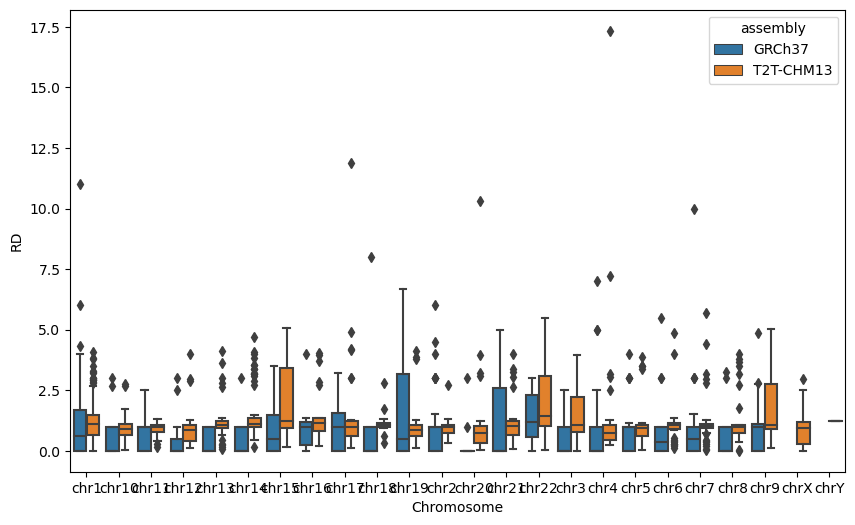

In [6]:
plt.figure(figsize=(10,6))
x = pd.concat([sample_old,sample_t2t])
sns.boxplot(data=x, x="Chromosome", y="RD", hue="assembly")
#plt.yscale('log')

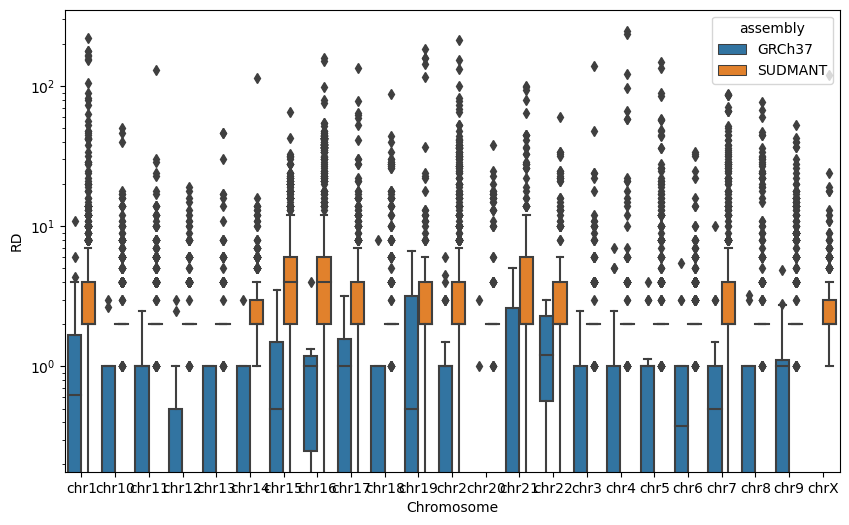

In [7]:
plt.figure(figsize=(10,6))
x = pd.concat([sample_old,sudmant])
sns.boxplot(data=x, x="Chromosome", y="RD", hue="assembly")
plt.yscale('log')

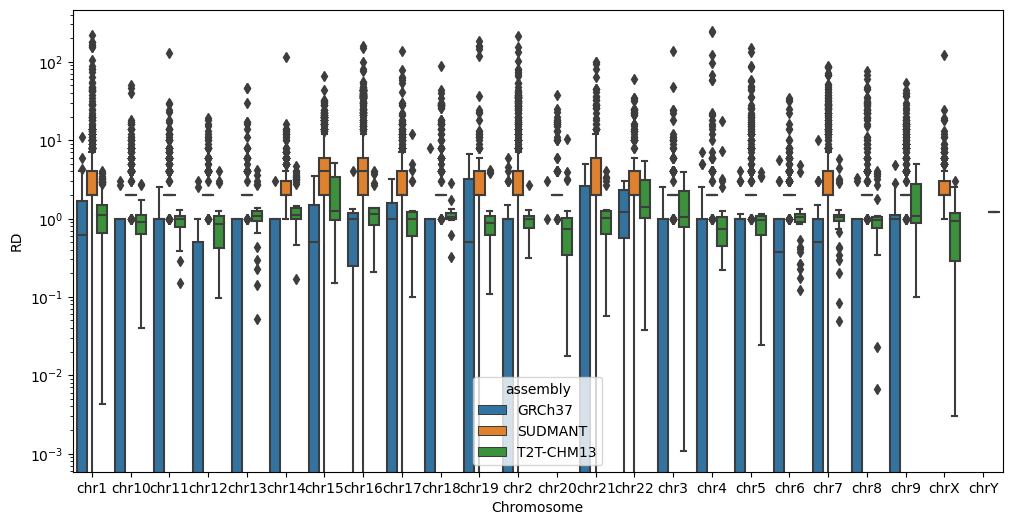

In [8]:
plt.figure(figsize=(12,6))
x = pd.concat([sample_old,sudmant,sample_t2t])
sns.boxplot(data=x, x="Chromosome", y="RD", hue="assembly")
plt.yscale('log')

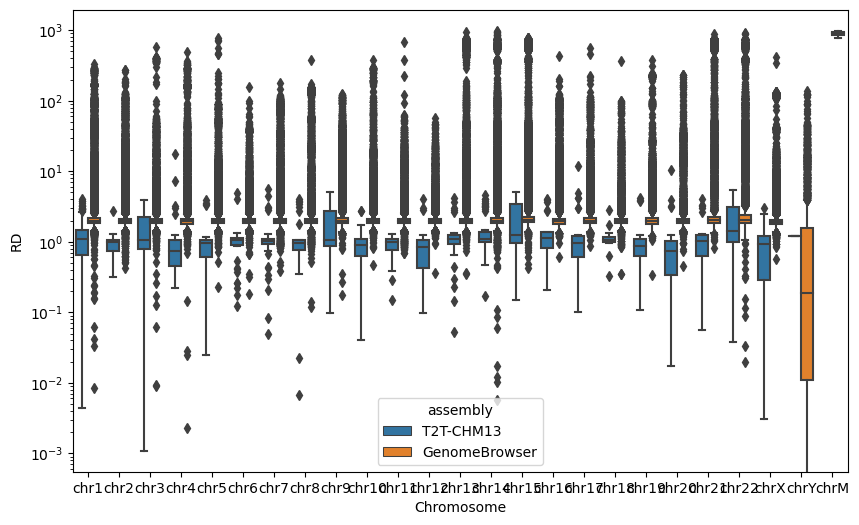

In [9]:
plt.figure(figsize=(10,6))
x = pd.concat([sample_t2t,t2t_genome])
sns.boxplot(data=x, x="Chromosome", y="RD", hue="assembly")
plt.yscale('log')

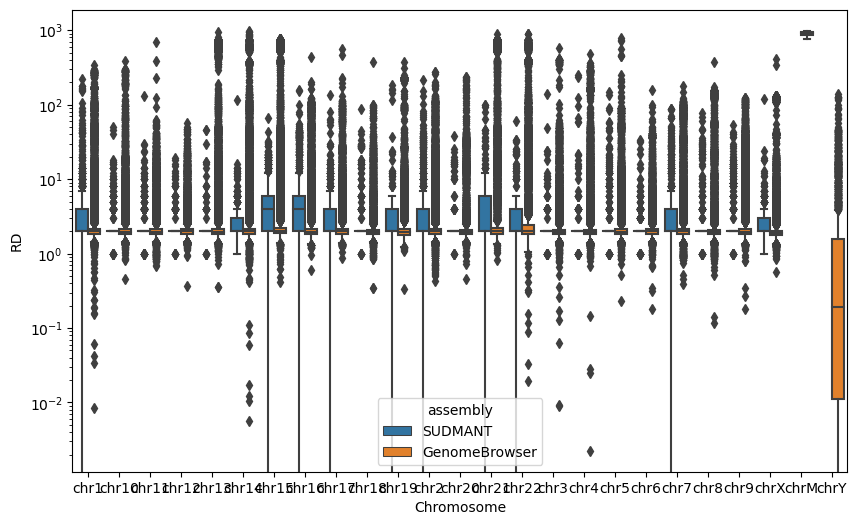

In [12]:
plt.figure(figsize=(10,6))
x = pd.concat([sudmant,t2t_genome])
sns.boxplot(data=x, x="Chromosome", y="RD", hue="assembly")
plt.yscale('log')